## seaborn을 이용한 시각화

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 한글 세팅하기
C드라이브 > Windows > Fonts > 맑은 고딕 더블클릭 > 맑은 고딕 보통 우클릭 속성

In [20]:
plt.rc("font", family = "batang")
plt.rc("axes",unicode_minus = False)

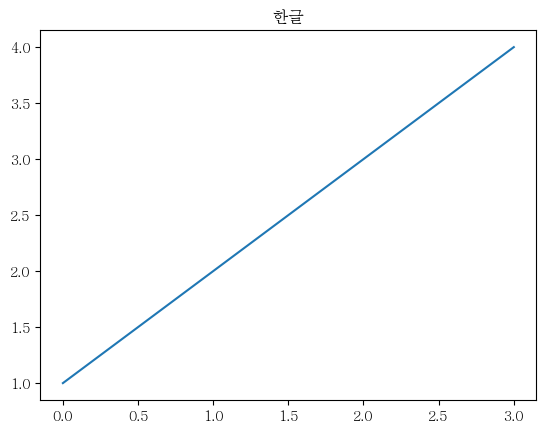

In [21]:
plt.plot([1,2,3,4])
plt.title("한글")
plt.show()

In [24]:
titanic= sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
print("missing value = ")
print(titanic.isnull().sum())

titanic_df = titanic.loc[:,:"fare"]
titanic_df.info()

titanic_df.dropna(axis = 0,inplace = True)
titanic_df.info()

missing value = 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------

In [29]:
##
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


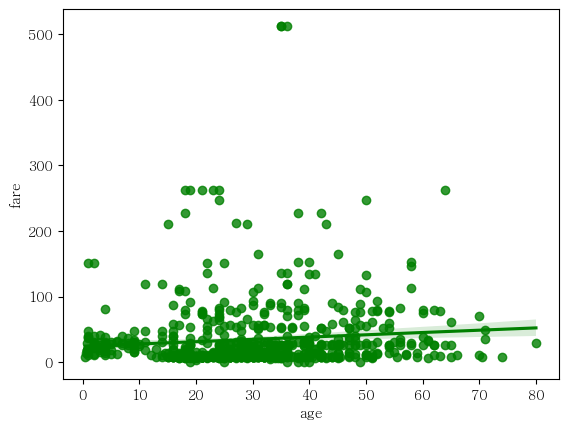

In [71]:
## sns.regplot

## age, fare
fig, ax = plt.subplots()
sns.regplot(titanic_df, x = "age", y = "fare", color = "green")
plt.show()
#fig.savefig("titanic_reg.png")    #파일 위치에 저장됨

## regplot

sns.regplot 사용법이라고 검색해 더 많은 자료를 참고할 수 있음
- 외우려고하면 너무 많아용

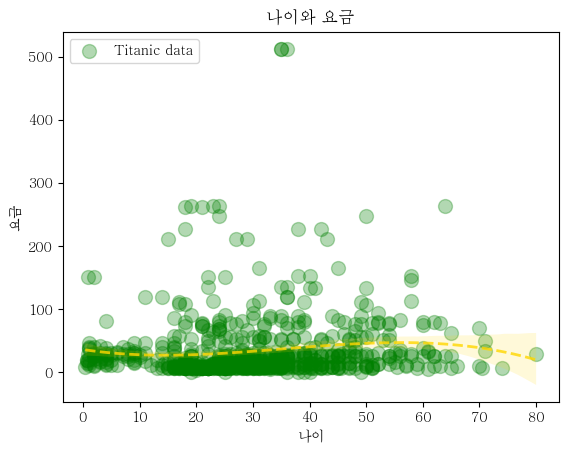

In [82]:
sns.regplot(titanic_df,
            x = "age", y = "fare",
            fit_reg = True,
            color = "gold",
            marker = "o",
            order = 3,                #차원을 말함 : 기본 1차원
            label = "Titanic data",
            scatter_kws = {"fc":"g","ec":"g","s":100, "alpha":0.3},
            line_kws = {"lw":2,"ls":"--","alpha":0.8})

plt.xlabel("나이")
plt.ylabel("요금")
plt.title("나이와 요금")
plt.legend(loc = 2)
plt.show()

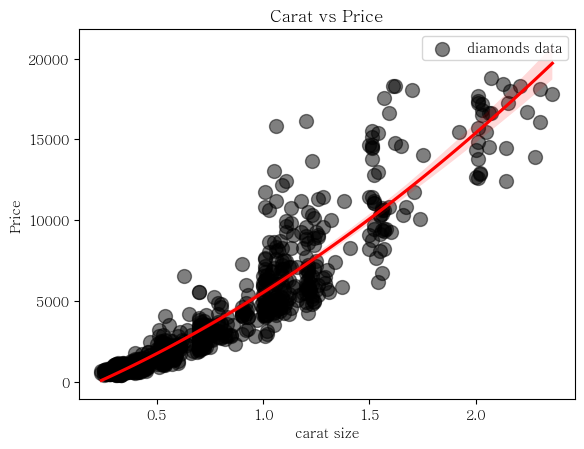

In [108]:
# Axus - level
diamonds = sns.load_dataset("diamonds")
diamonds.head()

## cut = ideal, price vs carat (replot)
## 원하는 정보 추출 : df[df["컬럼명"] == "원하는 값"]

diamonds_df = diamonds[diamonds["cut"] == "Ideal"]

sns.regplot(diamonds_df.sample(n = 1000),
            x = "carat", y = "price",
            fit_reg = True,
            color = "gold",
            marker = "o",
            order = 2,                #차원을 말함 : 기본 1차원
            label = "diamonds data",
            scatter_kws = {"fc":"k","ec":"k","s":100, "alpha":0.5}, #face color, edge color, size
            line_kws = {"color":"red"}) 

plt.xlabel("carat size")
plt.ylabel("Price")
plt.title("Carat vs Price")
plt.legend(loc = 1)
plt.show()

## lmplot

In [112]:
## sns.lmplot

penguins = sns.load_dataset("penguins")
print(penguins.head())

print(penguins["species"].value_counts())
print(penguins.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     

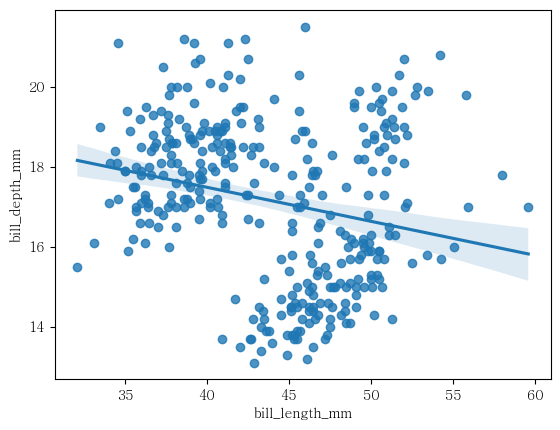

In [113]:
# 종류를 구분하지 않음
sns.regplot(penguins,
            x = "bill_length_mm",
            y = "bill_depth_mm")

plt.show()  #

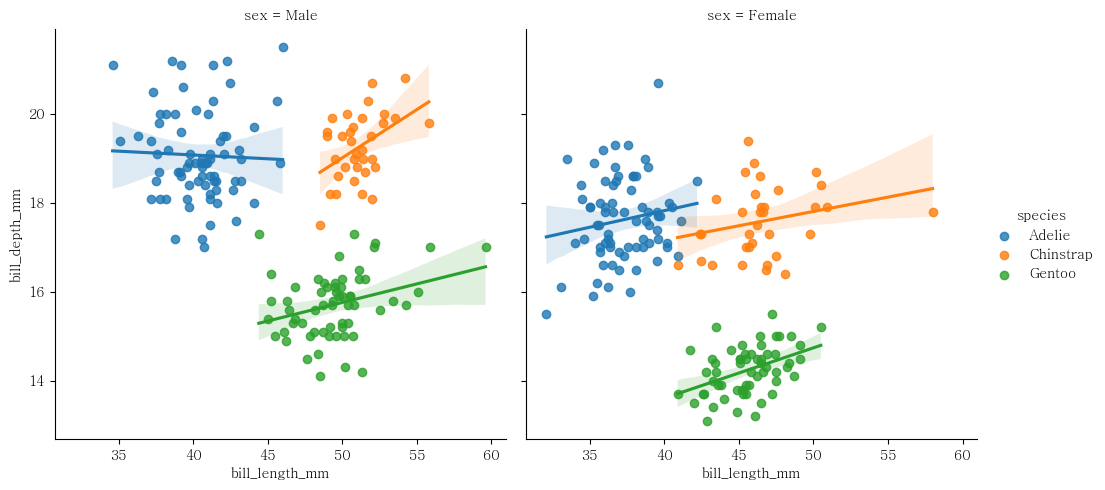

In [128]:
## Figure level plot
sns.lmplot(penguins,
            x = "bill_length_mm",
            y = "bill_depth_mm",
            hue = "species",
            col = "sex")
plt.show()  

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


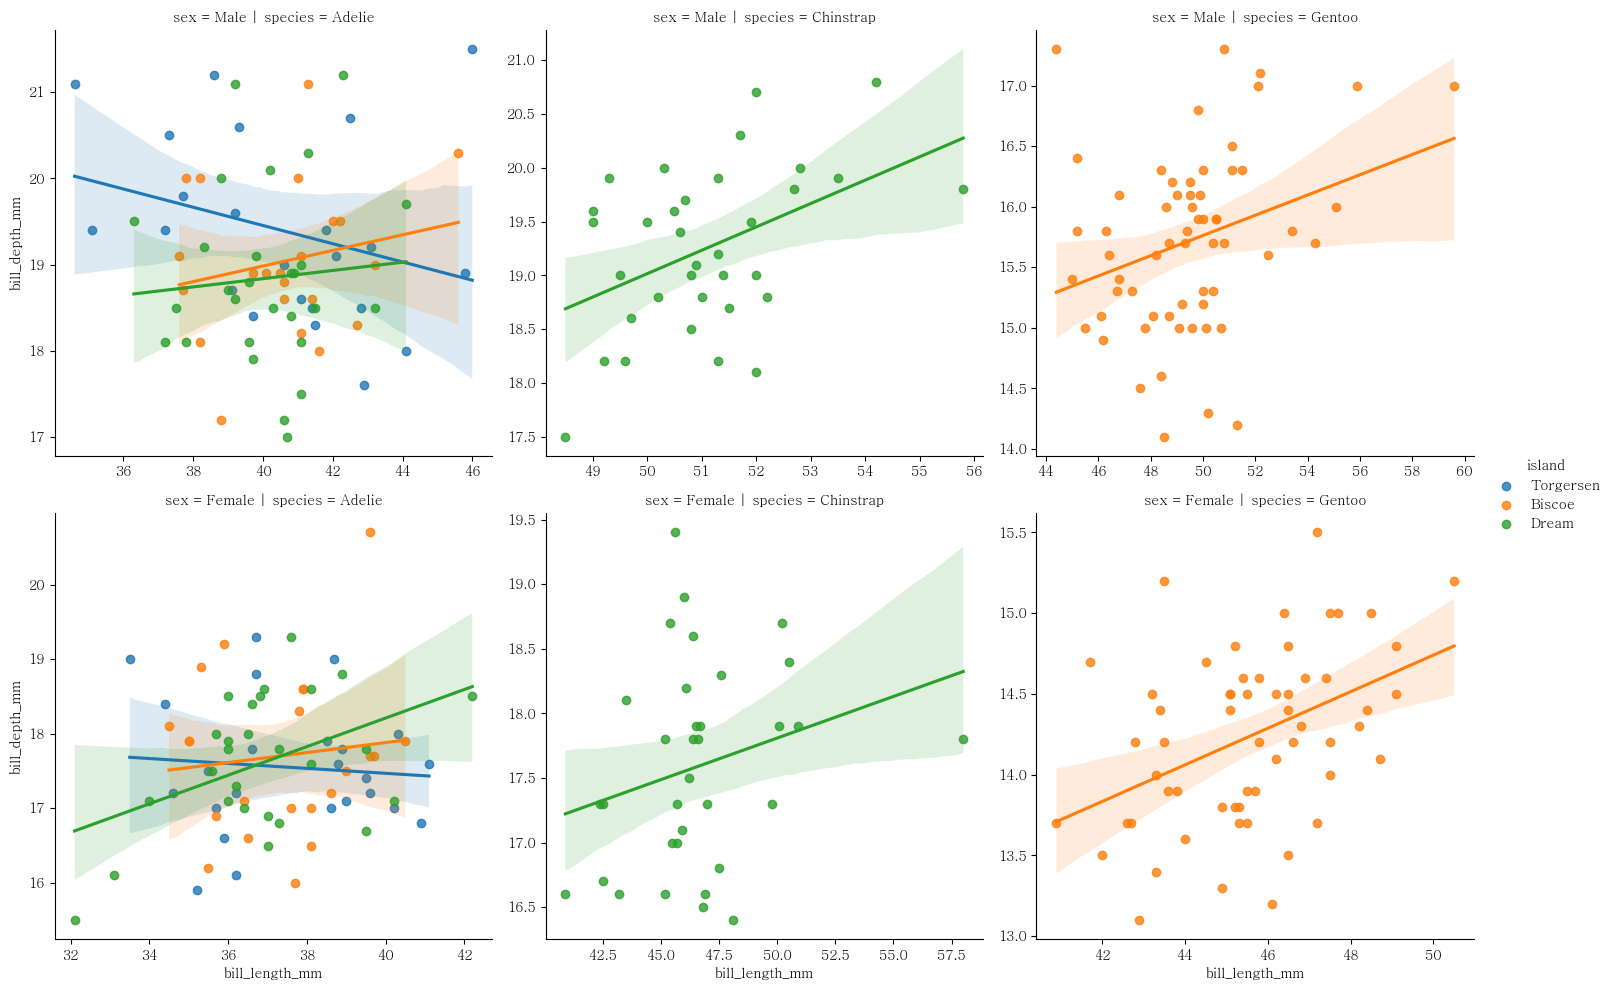

In [127]:
## species 별로 구분하기
sns.lmplot(penguins,
            x = "bill_length_mm",
            y = "bill_depth_mm",
            col = "species",
            row = "sex",
            hue = "island",
            sharex = False,
            sharey = False)

plt.show()

In [135]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


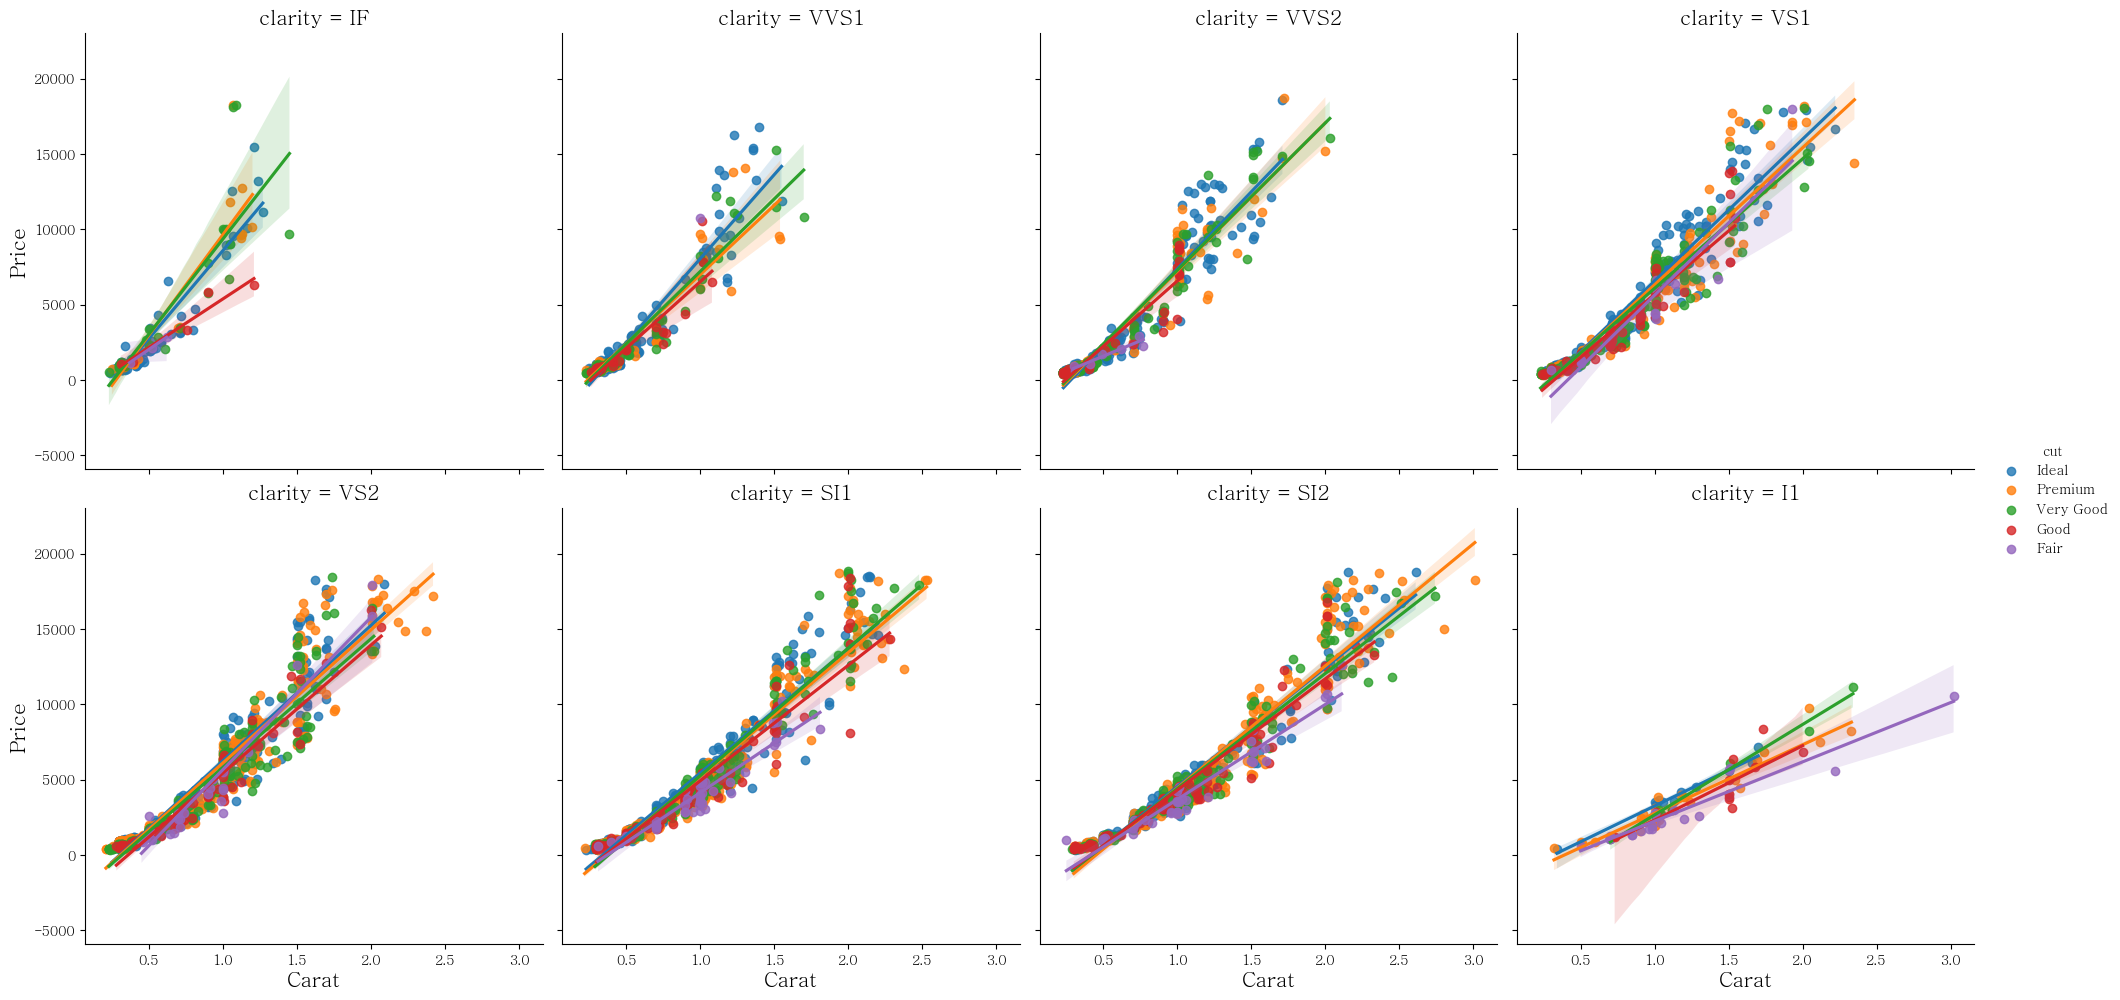

In [150]:
## 실습
diamonds_df.head()

p = sns.lmplot(diamonds.sample(n = 5000),
            x = "carat",
            y = "price",
            col = "clarity",
            col_wrap = 4,      #쪼개겠다는 의미
            hue = "cut"
            )
        
p.set_titles(size = 15)
p.set_xlabels("Carat",size = 15)
p.set_ylabels("Price", size = 15)
plt.show()

In [175]:
## sns.scatterplot
tips = sns.load_dataset("tips")
print("tips = \n", tips.head())
print(tips.info())

tips = 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [176]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


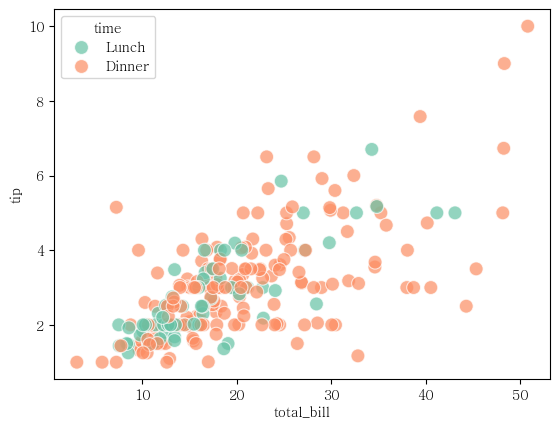

In [165]:
##
sns.scatterplot(tips,
                x = "total_bill",
                y = "tip",
                hue = "time",
                #style = "smoker"   
                s = 100, 
                alpha = 0.7,
                palette = "Set2") 

tips.legends = "time"

In [171]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [206]:
## 실습
color_idx = (diamonds["color"] == "D")|(diamonds["color"] == "E")|(diamonds["color"] == "F")

cut_idx = (diamonds["cut"] == "Ideal")|(diamonds["cut"] == "Good")|(diamonds["cut"] == "Fair")

final_idx = color_idx & cut_idx
print(final_idx)

diamonds_df = diamonds[final_idx]
#diamonds_df.shape

## idx의 종류 제거
diamonds_df["color"] = diamonds_df["color"].cat.remove_unused_categories()
diamonds_df["cut"] = diamonds_df["cut"].cat.remove_unused_categories()

0         True
1        False
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937    False
53938    False
53939     True
Length: 53940, dtype: bool


C:\Users\user\AppData\Local\Temp\ipykernel_624\3502328275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df["color"] = diamonds_df["color"].cat.remove_unused_categories()
C:\Users\user\AppData\Local\Temp\ipykernel_624\3502328275.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df["cut"] = diamonds_df["cut"].cat.remove_unused_categories()


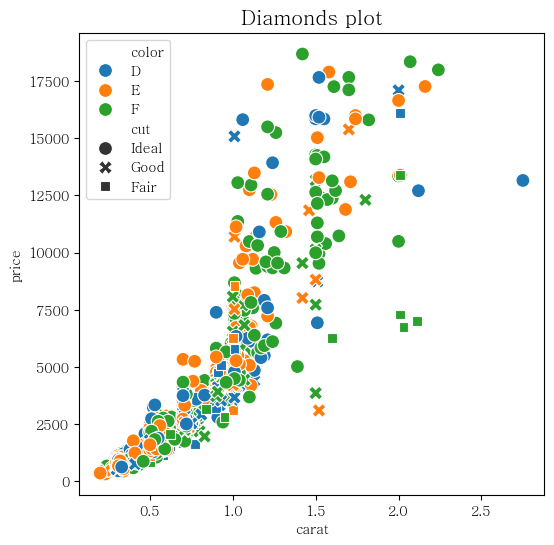

In [211]:
fig, ax = plt.subplots(figsize = (6,6))

x= sns.scatterplot(diamonds_df.sample(n=1000),
                x = "carat",
                y = "price",
                hue = "color",
                style = "cut",   
                s = 100,
                ax = ax )
ax.set_title("Diamonds plot",fontsize = 15)
plt.show()

In [228]:
penguins.head()

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


## bar plot

이산형에 대한 연속형 데이터에 적합함

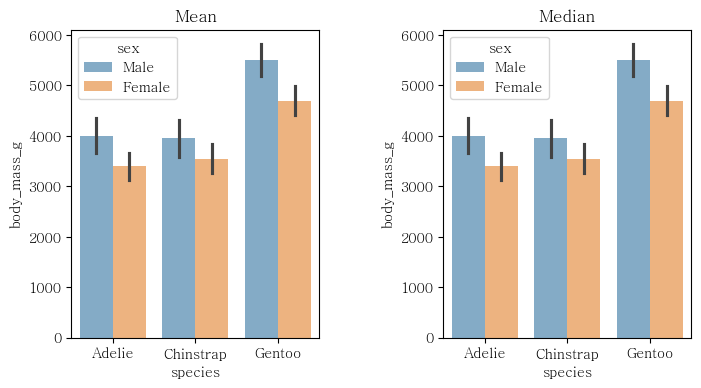

In [226]:
fig, axs = plt.subplots(1,2, figsize = [8,4]) #1행 2열로 그리겠다
sns.barplot(penguins,
            x = "species",
            y = "body_mass_g",
            alpha = 0.6,
            errorbar = "sd",                      #맨 위의 꼭지
            hue = "sex",
            estimator = "median", ax = axs[0])

#표 이름 설정
axs[0].set_title("Mean")
axs[1].set_title("Median")

sns.barplot(penguins,
            x = "species",
            y = "body_mass_g",
            alpha = 0.6,
            errorbar = "sd",
            hue = "sex",
            estimator = "median", ax = axs[1])

plt.subplots_adjust(wspace = 0.5) #그래프의 넓이
plt.show()

In [227]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [236]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


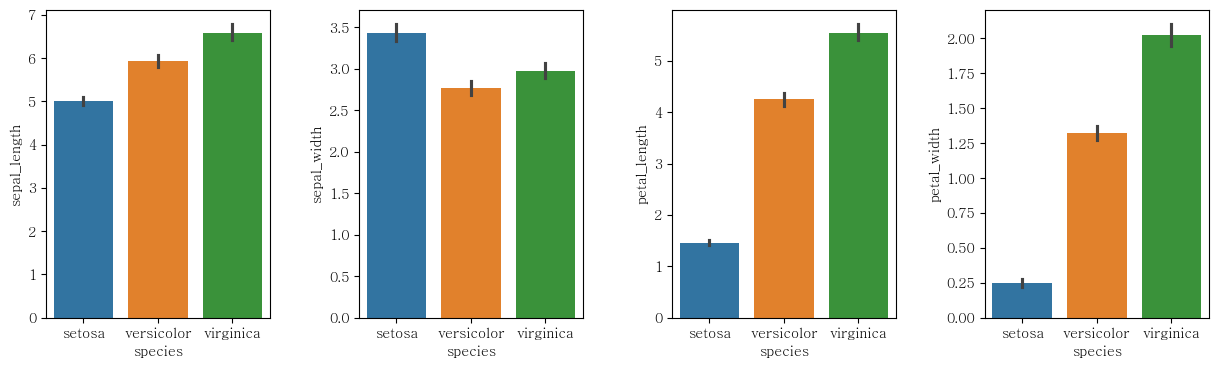

In [245]:
## 방법 1
fig, axes = plt.subplots(1,4, figsize = (15,4)) #1행 2열로 그리겠다
sns.barplot(iris,
            x = "species",
            y = "sepal_length",                 #맨 위의 꼭지
            hue = "species",
            ax = axes[0])

sns.barplot(iris,
            x = "species",
            y = "sepal_width",                 
            hue = "species",
            ax = axes[1])

sns.barplot(iris,
            x = "species",
            y = "petal_length",                 
            hue = "species",
            ax = axes[2])

sns.barplot(iris,
            x = "species",
            y = "petal_width",                
            hue = "species",
            ax = axes[3])

plt.subplots_adjust(wspace = 0.4)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

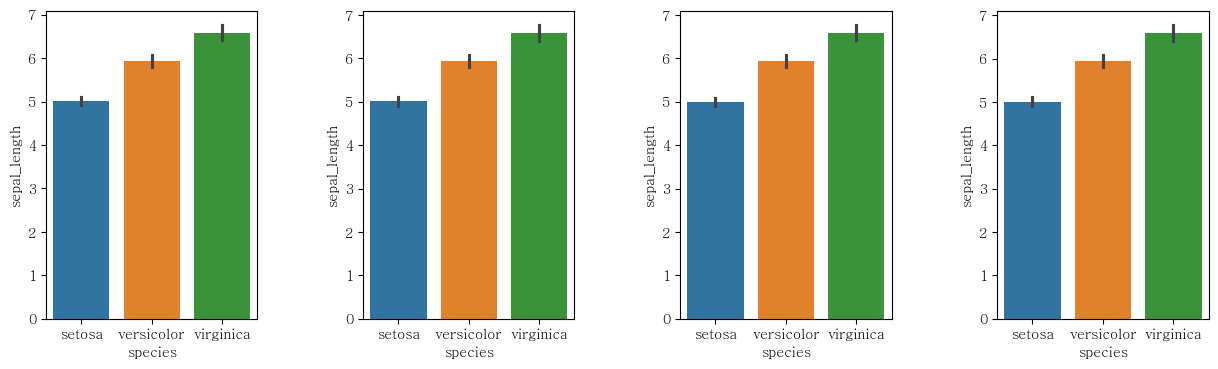

In [246]:
## 방법 2
fig, axes = plt.subplots(1,4, figsize = (15,4)) #1행 2열로 그리겠다
for i in range(4):
    sns.barplot(iris,x = "species",y = "sepal_length",hue = "species",ax = axes[i])

plt.subplots_adjust(wspace = 0.5)
plt.set_title("species")
plt.show()


## 실습

In [29]:
import seaborn as sns
mpg = pd.read_excel("./dataset/mtcars.xlsx")
print(mpg.head())

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  


In [33]:
## result1
 
result_1 = mpg.groupby('cyl')['mpg'].agg(['mean', 'std'])

# cyl_idx = (mpg["cylinders"] == "4")|(mpg["cylinders"] == "6")|(mpg["cylinders"] == "8")
# mpg["cylinders"] = mpg["cylinders"].cat.remove_unused_categories()

result_1

,mean,std
cyl,,
4,26.663636,4.509828
6,19.742857,1.453567
8,15.100000,2.560048


In [36]:
## result 2

# 열 이름을 맞춰줍니다. mpg 데이터셋에는 'weight' 대신 'weight'를 wt로 가정
mpg.rename(columns={'weight': 'wt'}, inplace=True)

# 5-number summary 테이블 출력
summary = mpg[['mpg', 'wt']].describe().loc[['max', '25%', '50%', '75%', 'min']]

print("### Result_2. Five number summary table of mpg, wt")
summary


### Result_2. Five number summary table of mpg, wt


,mpg,wt
max,33.900,5.42400
25%,15.425,2.58125
50%,19.200,3.32500
75%,22.800,3.61000
min,10.400,1.51300


In [27]:
## result3

mpg = load_dataset("mpg").dropna()
mpg.value_counts("cylinders")

cylinders
4    199
8    103
6     83
3      4
5      3
Name: count, dtype: int64